# MODELING

## Wczytanie pakietów, ustawień i danych

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pd.set_option('display.max_columns', None)

In [2]:
df_scaled = pd.read_csv('../data/processed/processed_data_scaled.csv')
df_unscaled = pd.read_csv('../data/processed/processed_data_unscaled.csv')

In [3]:
df_scaled.head()

,City,Avg_living_area_m2_per_person,Crude_birth_rate,Share_foreigners,Infant_mortality_rate,Cars_per_1000,Old_dependency_ratio,Road_deaths_per_10000,Population,Share_students_higher_edu,Unemployment_rate,Country_code
0,'s-Gravenhage,1.343093,0.227929,1.182244e+00,-0.288103,-0.714701,-0.908014,-0.468346,1.010555,-0.092105,-0.620250,NL
1,'s-Hertogenbosch,0.128875,0.318075,-5.140985e-01,-0.817979,0.284758,-0.351932,-0.634215,-0.137710,-0.493550,-1.196358,NL
2,A Coruña,-0.053392,-1.300796,-3.694491e-01,0.296120,-0.377607,1.272411,-0.675682,0.014579,0.393397,0.468887,ES
3,Aachen,1.022062,-0.320459,1.563592e+00,-0.356036,-0.632993,-0.600706,-0.675682,0.022996,2.296274,-0.544557,DE
4,Aalborg,1.274301,1.061779,-2.335899e-16,-0.491901,-0.396017,-0.673874,-0.412121,-0.089207,0.068059,0.021414,DK


In [4]:
df_unscaled.head()

,City,Avg_living_area_m2_per_person,Crude_birth_rate,Share_foreigners,Infant_mortality_rate,Cars_per_1000,Old_dependency_ratio,Road_deaths_per_10000,Population,Share_students_higher_edu,Unemployment_rate,Country_code
0,'s-Gravenhage,49.30000,9.64,19.400000,3.06,367.250000,26.0,0.170000,813669.000000,64.800000,5.270000,NL
1,'s-Hertogenbosch,38.70971,9.88,6.500000,1.89,546.450000,29.8,0.130000,160757.000000,37.100000,2.530000,NL
2,A Coruña,37.12000,5.57,7.600000,4.35,427.690000,40.9,0.120000,247350.000000,98.300000,10.450000,ES
3,Aachen,46.50000,8.18,22.300000,2.91,381.900000,28.1,0.120000,252136.000000,229.600000,5.630000,DE
4,Aalborg,48.70000,11.86,10.409512,2.61,424.389117,27.6,0.183559,188336.313756,75.851431,8.321792,DK


## Grupowanie metodą KNN

Przed przeprowadzeniem właściwej klasteryzacji konieczne jest określenie odpowiedniej liczby klastrów k. W przypadku algorytmu K-means parametr ten nie jest znany a priori i jego dobór ma istotny wpływ na strukturę oraz interpretowalność uzyskanych grup.

W pierwszym etapie do oszacowania optymalnej liczby klastrów zastosowano metodę łokcia, opartą na analizie wartości funkcji celu (inertia) w zależności od liczby klastrów. Metoda ta pozwala wstępnie ocenić, dla jakiej wartości k dalsze zwiększanie liczby klastrów przestaje przynosić istotną poprawę dopasowania modelu.

Należy jednak podkreślić, że metoda łokcia ma charakter heurystyczny i jej skuteczność zależy od struktury danych - w szczególności od stopnia separacji oraz kształtu klastrów. Z tego względu wyniki tej metody traktowane są jako punkt odniesienia, a nie jedyne kryterium wyboru liczby klastrów.

In [5]:
X = df_scaled.drop(['City', 'Country_code'], axis=1)

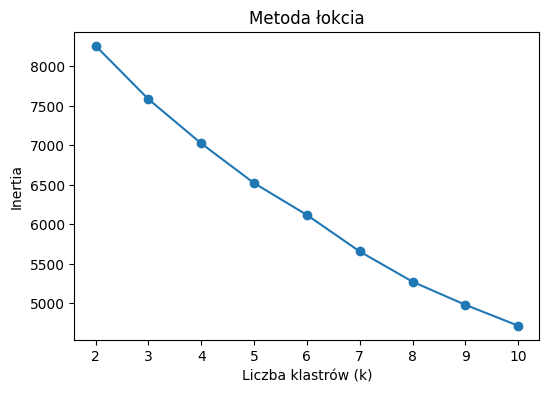

In [6]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Liczba klastrów (k)")
plt.ylabel("Inertia")
plt.title("Metoda łokcia")
plt.show()

    k  silhouette_score
0   2          0.148641
1   3          0.133039
2   4          0.125043
3   5          0.134373
4   6          0.142584
5   7          0.139418
6   8          0.145878
7   9          0.140566
8  10          0.151731


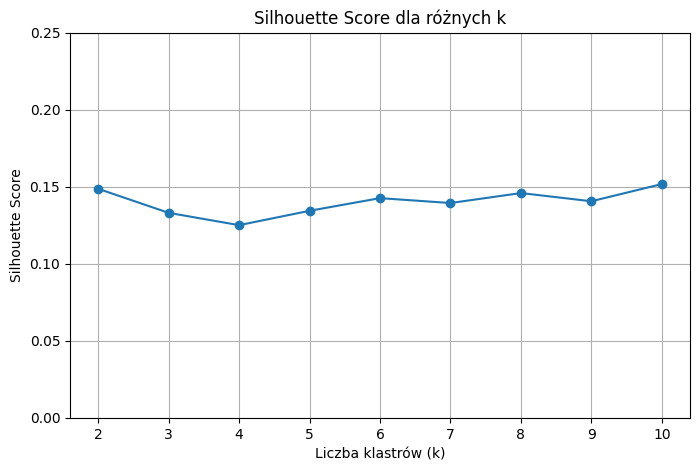

In [7]:
sil_scores = []

k_range = range(2, 11)  # te same wartości k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)

# Tworzymy tabelkę
sil_df_scaled = pd.DataFrame({
    'k': k_range,
    'silhouette_score': sil_scores
})

print(sil_df_scaled)

# Wykres silhouette
plt.figure(figsize=(8,5))
plt.plot(sil_df_scaled['k'], sil_df_scaled['silhouette_score'], marker='o')
plt.ylim(0, 0.25)
plt.xlabel('Liczba klastrów (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score dla różnych k')
plt.grid(True)
plt.show()

W celu uzupełnienia analizy metody łokcia obliczono wartości silhouette score dla liczby klastrów k od 2 do 10. Miara silhouette ocenia jednocześnie spójność klastrów (cohesion) oraz stopień ich separacji (separation), przyjmując wartości z przedziału ⟨−1, 1⟩, gdzie wyższe wartości oznaczają lepszą strukturę klastrów.

Uzyskane wartości silhouette score są relatywnie niskie (≈ 0.12–0.15) i nie wykazują wyraźnego globalnego maksimum. Taki wynik wskazuje, że klastry nie są silnie rozdzielone w przestrzeni cech, co jest zgodne z wcześniejszymi obserwacjami opartymi na metodzie łokcia. Dane opisujące miasta europejskie tworzą ciągłe spektrum cech, a nie zbiór naturalnie wyraźnie oddzielonych grup.

Najwyższą wartość silhouette score uzyskano dla k = 10 (≈ 0.152), jednak różnice pomiędzy kolejnymi wartościami k są niewielkie i nie wskazują jednoznacznie na jedną optymalną liczbę klastrów. Warto zauważyć, że porównywalnie wysokie wartości uzyskano również dla k = 2, k = 6 oraz k = 8, co sugeruje istnienie kilku możliwych, równie uzasadnionych poziomów segmentacji danych.

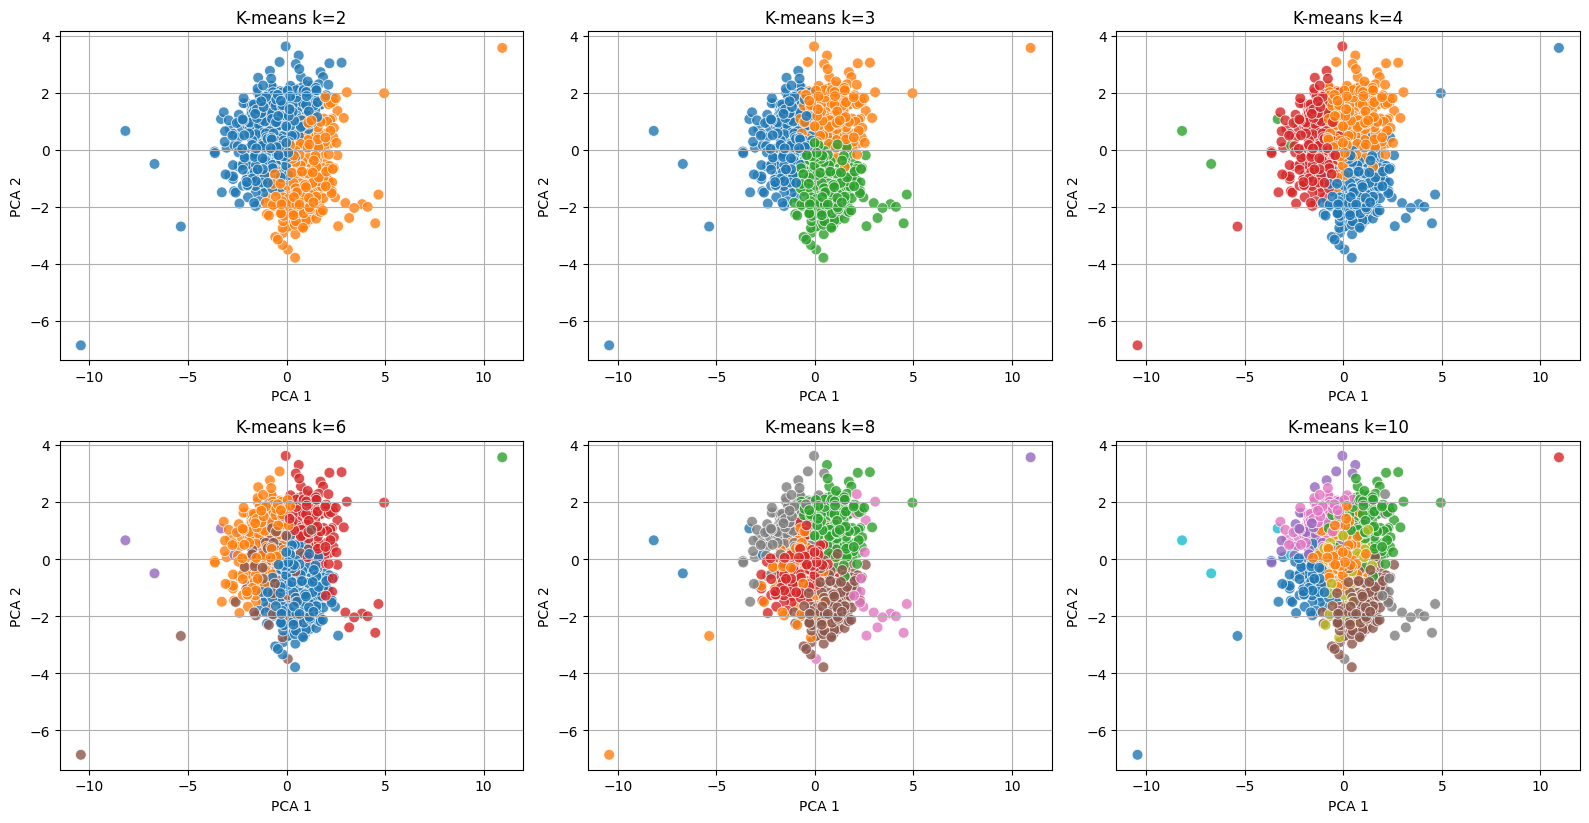

In [8]:
# Redukcja do 2 wymiarów
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

k_values = [2, 3, 4, 6, 8, 10]

plt.figure(figsize=(16, 12))
for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = kmeans.fit_predict(X)  # używamy oryginalnych, ustandaryzowanych danych
    
    plt.subplot(3, 3, i)
    sns.scatterplot(
        x=X_pca[:,0], 
        y=X_pca[:,1],
        hue=labels,
        palette='tab10',
        s=60,
        alpha=0.8,
        legend=False
    )
    plt.title(f'K-means k={k}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)

plt.tight_layout()
plt.show()

**Interpretacja wizualizacji PCA dla różnych k:**

Wizualizacja miast w przestrzeni zredukowanej do dwóch wymiarów przy użyciu PCA
dla różnych wartości liczby klastrów \(k\) potwierdza wyniki uzyskane wcześniej
metodą łokcia oraz oceną silhouette score. Punkty tworzą raczej ciągłą chmurę
o regularnym kształcie, bez wyraźnie oddzielonych skupień. Dane nie mają więc
naturalnej struktury klastrów – różnice między miastami mają charakter stopniowy.

Wybór liczby klastrów jest w dużym stopniu arbitralny i zależy przede
wszystkim od potrzeb interpretacyjnych. W obserwacjach wizualnych widać, że
przy \(k=3\) klastry najmniej nachodzą na siebie, natomiast przy \(k=4\) jeden
z klastrów grupuje kilka odrębnych punktów będących outlierami, co utrudnia
interpretację. Z tego względu **do dalszej analizy wybrano \(k=3\)**, co zapewnia
czytelny podział miast i pozwala łatwiej zinterpretować charakterystykę każdego
segmentu.


## Model K-means dla k=3

In [9]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
labels = kmeans.fit_predict(X)

In [10]:
cluster_df = pd.DataFrame({
    'City': df_scaled['City'],
    'Country_code': df_scaled['Country_code'],
    'cluster': labels
})

# Merge z df_unscaled po identyfikatorach
df_scaled = df_scaled.merge(cluster_df, on=['City', 'Country_code'], how='left')
df_unscaled = df_unscaled.merge(cluster_df, on=['City', 'Country_code'], how='left')

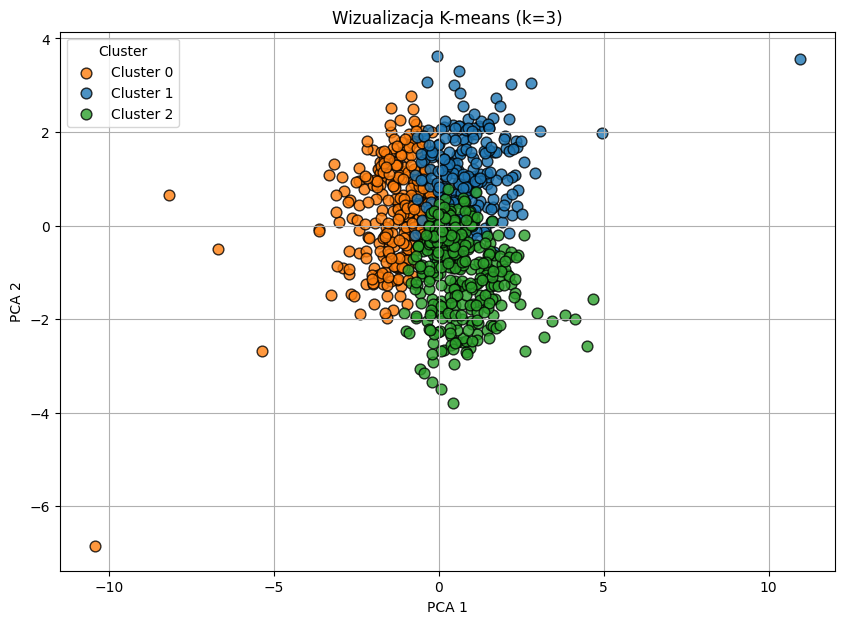

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

cluster_colors = ['#FF7F0E', '#1F77B4', '#2CA02C']

plt.figure(figsize=(10,7))
for cluster_id, color in enumerate(cluster_colors):
    plt.scatter(
        X_pca[df_scaled['cluster'] == cluster_id, 0],
        X_pca[df_scaled['cluster'] == cluster_id, 1],
        c=color,
        label=f'Cluster {cluster_id}',
        edgecolor='k',
        s=60,
        alpha=0.8
    )

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Wizualizacja K-means (k=3)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [12]:
cluster_summary = df_unscaled.drop(['City', 'Country_code'], axis=1).groupby('cluster').mean()
print(cluster_summary)

         Avg_living_area_m2_per_person  Crude_birth_rate  Share_foreigners  \
cluster                                                                      
0                            41.726614         10.530900         16.556025   
1                            43.992750          7.682837         10.174419   
2                            31.029276          8.613667          5.863882   

         Infant_mortality_rate  Cars_per_1000  Old_dependency_ratio  \
cluster                                                               
0                     3.549904     423.372343             28.570088   
1                     3.966000     575.436912             40.663256   
2                     3.663672     507.525602             30.465733   

         Road_deaths_per_10000     Population  Share_students_higher_edu  \
cluster                                                                    
0                     0.206873  384487.804470                 102.843613   
1                     0.3

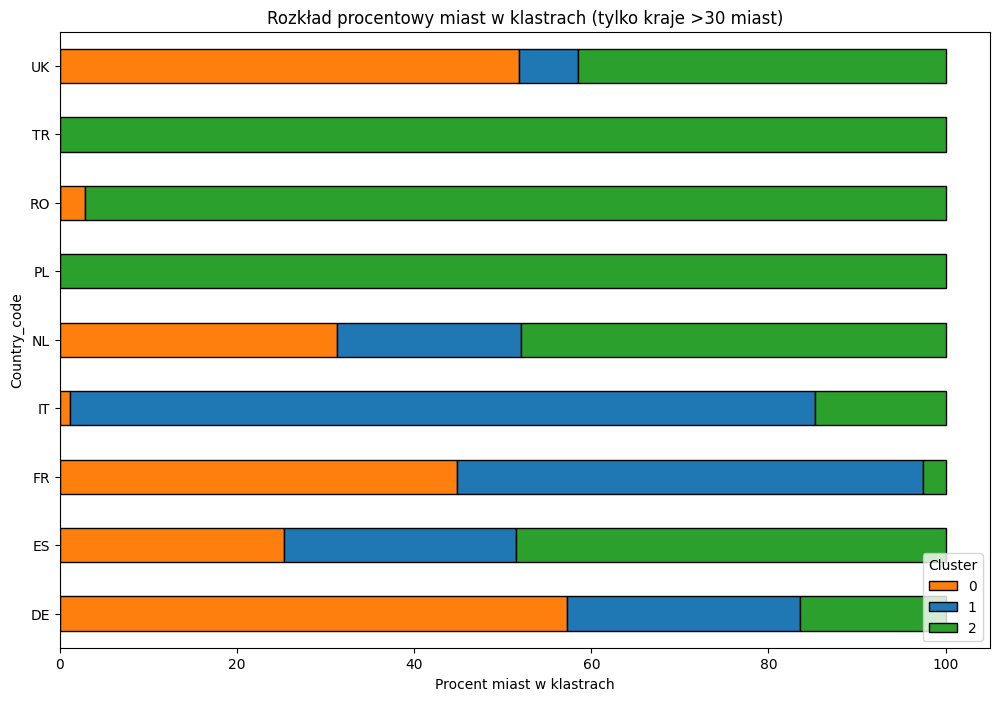

In [13]:
# df_unscaled: nieustandaryzowane dane z kolumną 'cluster' i 'Country_code'
country_counts = df_unscaled.groupby(['Country_code', 'cluster']).size().unstack(fill_value=0)


total_cities = country_counts.sum(axis=1)
countries_large = total_cities[total_cities > 20].index
country_counts = country_counts.loc[countries_large]

# konwersja na procenty
country_perc = country_counts.div(country_counts.sum(axis=1), axis=0) * 100

country_perc.plot(
    kind='barh',
    stacked=True,
    figsize=(12,8),
    color=cluster_colors,
    edgecolor='k'
)

plt.xlabel('Procent miast w klastrach')
plt.ylabel('Country_code')
plt.title('Rozkład procentowy miast w klastrach (tylko kraje >30 miast)')
plt.legend(title='Cluster', loc='lower right')
plt.show()

In [14]:
# Funkcja do wyciągnięcia top N miast w danym klastrze
def top_n_cities(df, cluster_col='cluster', city_col='City', pop_col='Population', n=30):
    top_cities = (
        df.sort_values([cluster_col, pop_col], ascending=[True, False])
          .groupby(cluster_col)[city_col]
          .head(n)
          .reset_index(drop=True)
    )
    return top_cities

# Tworzymy słownik z listami top miast dla każdego klastra
clusters = sorted(df_unscaled['cluster'].unique())
top_cities_dict = {
    f'Cluster {c}': df_unscaled[df_unscaled['cluster']==c]
                    .sort_values('Population', ascending=False)['City']
                    .head(30)
                    .reset_index(drop=True)
    for c in clusters
}

# Tworzymy finalny DataFrame
top_cities_df = pd.DataFrame(top_cities_dict)

# Wyświetlamy
top_cities_df

,Cluster 0,Cluster 1,Cluster 2
0,Paris,Roma,Napoli
1,London,Porto,Bucuresti
2,Madrid,Torino,Warszawa
3,Barcelona,Bilbao,Budapest
4,Berlin,Palermo,Praha
5,Milano,Genova,Sofia
6,Lisboa,Nice,Sevilla
7,Hamburg,Liège,Kraków
8,Stockholm,Bologna,Zagreb
9,München,Firenze,Zaragoza


Szczegółowa analiza otrzymanych wyników w dokumentacji.

In [15]:
# !pip freeze > requirements.txt